In [1]:
# Python_version 2.7.15

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import os
import scipy.io
from scipy import stats
import octopus as oct

In [2]:
filenames =['R38G02_ArcLight_SING_1s3p_006_2020-01-09_15.21_Ftrace_mean',
            'R38G02_ArcLight_SING_1s3p_009_2020-01-09_16.42_Ftrace_mean',
            'R38G02_ArcLight_SING_013_2020-01-09_18.17_Ftrace_mean',
            'R38G02_ArcLight_SING_001_2020-01-10_10.56_Ftrace_mean',
            'R38G02_ArcLight_SING_006_2020-01-10_15.20_Ftrace_mean',
            'R38G02_ArcLight_SING_004_2020-01-13_17.03_Ftrace_mean',
            'R38G02_ArcLight_SING_006_2020-01-24_18.04_Ftrace_mean',
            'R38G02_ArcLight_SING_009_2020-08-11_18.56_Ftrace_mean',
            'R38G02_ArcLight_SING_001_2020-08-13_14.44_Ftrace_mean',
            'R38G02_ArcLight_SING_001_2020-08-28_15.35_Ftrace_mean',
            'R38G02_ArcLight_SING_001_2020-09-04_14.55_Ftrace_mean',
            'R38G02_ArcLight_SING_004_2020-09-07_14.06_Ftrace_mean',
            'R38G02_ArcLight_SING_008_2020-09-07_16.34_Ftrace_mean',
            'R38G02_ArcLight_SING_012_2020-09-07_18.14_Ftrace_mean',
            'R38G02_ArcLight_SING_003_2020-09-09_12.32_Ftrace_mean']

In [3]:
# Import Data
time = np.load('time.npy')

for i in range(len(filenames)):
    a = np.load(filenames[i] + '.npy')
    if(i==0):
        Ftrace_all = a
    if(i==1):
        Ftrace_all = np.stack((Ftrace_all,a), axis=2)   
    if(i>1):
        a = a[:,:,np.newaxis]
        Ftrace_all = np.concatenate((Ftrace_all,a), axis=2)   

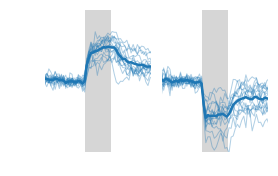

In [4]:
fig = plt.figure(figsize = (4, 2.6))

plt.subplots_adjust(wspace=0.1)

ax = fig.add_subplot(121)
plt.plot(time,Ftrace_all[:,6,:], color = 'C0', alpha = 0.35, linewidth = 1)
plt.plot(time,np.mean(Ftrace_all[:,6,:], axis=1), color = 'C0', linewidth = 2.5)
plt.axvspan(0, 1, facecolor='0.2', alpha=0.2)
plt.xlim([-1.5,2.5])
plt.ylim([-0.16,0.16])
plt.axis('off') 

ax = fig.add_subplot(122)
plt.plot(time,Ftrace_all[:,2,:], color = 'C0', alpha = 0.35, linewidth = 1)
plt.plot(time,np.mean(Ftrace_all[:,2,:], axis=1), color = 'C0', linewidth = 2.5)
plt.axvspan(0, 1, facecolor='0.2', alpha=0.2)
plt.xlim([-1.5,2.5])
plt.ylim([-0.135,0.135])
plt.axis('off')

bbox_inches = 'tight'
#plt.savefig('Fig1_R38G02_Ftraces.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

In [5]:
rotations = [0,45,90,135,180,225,270,315,360]
Ftrace_mean = np.zeros([len(rotations),len(filenames)])
Ftrace_sem = np.zeros([len(rotations)])
for i in range(len(rotations)):
    Ftrace_sem[i] = stats.sem(np.mean(Ftrace_all[38:51,i,:],0))
    for j in range(len(filenames)):
        Ftrace_mean[i,j] = np.mean(Ftrace_all[np.int(np.where(time == 0)[0]):51,i,j])

In [6]:
# Input to MOI function
rot_rad = np.radians(rotations[0:8])
radius = np.mean(Ftrace_mean[0:8,:],1)

In [7]:
MOI_flies = np.empty(len(Ftrace_mean[0,:]))
for i in range(len(Ftrace_mean[0,:])):
    MOI_flies[i] = oct.MOI(rot_rad, Ftrace_mean[0:8,i])

D_magn =0.1201234090257115   D_deg = 234.1188998487069
H_magn =0.18607850228295927   H_deg = 247.17137415252589
MOI = 0.6288735954784855
D_magn =0.2383859370178115   D_deg = 225.0877563442411
H_magn =0.2818756267783029   H_deg = 234.99000656229242
MOI = 0.8331142448579973
D_magn =0.19402102120753228   D_deg = 246.31279276384674
H_magn =0.19814996046658798   H_deg = 249.50749312437114
MOI = 0.9776408593815311
D_magn =0.18503379756447313   D_deg = 241.7779190687433
H_magn =0.15693339662474876   H_deg = 244.48776567987818
MOI = 0.8471852722231108
D_magn =0.13797204447653508   D_deg = 234.77101351007036
H_magn =0.17038308848657652   H_deg = 238.26392323666425
MOI = 0.8082711805720193
D_magn =0.12930094244556126   D_deg = 230.90191234244244
H_magn =0.14477549688181376   H_deg = 231.86199804448106
MOI = 0.8929880590107621
D_magn =0.15968839901590695   D_deg = 241.3295569352785
H_magn =0.10498808120826335   H_deg = 250.96266316672776
MOI = 0.6481854574352042
D_magn =0.13068131959728244   D_de

In [8]:
LDir_flies = np.empty(len(Ftrace_mean[0,:]))
for i in range(len(Ftrace_mean[0,:])):
    LDir_flies[i] = oct.LDir(rot_rad, Ftrace_mean[0:8,i])

R_magn =0.30431004219184793   R_deg = 242.05669695524523
R_indiv_magn = 0.42435320543661964
LDir = 0.7171149841527448
R_magn =0.518333892426749   R_deg = 230.45378176788293
R_indiv_magn = 0.6977142593570821
LDir = 0.7429028222877005
R_magn =0.3920186030025494   R_deg = 247.926964869355
R_indiv_magn = 0.5637981661100627
LDir = 0.695317272326886
R_magn =0.34187222658118366   R_deg = 243.02148391752127
R_indiv_magn = 0.48423158876509936
LDir = 0.7060097575481095
R_magn =0.3082134782184869   R_deg = 236.7010935597719
R_indiv_magn = 0.4261539824399392
LDir = 0.7232443926812898
R_magn =0.27406685046181106   R_deg = 231.40905939298932
R_indiv_magn = 0.3630099049091424
LDir = 0.7549844969943923
R_magn =0.2637818021077156   R_deg = 245.14842909692385
R_indiv_magn = 0.3514259748809948
LDir = 0.7506041697601932
R_magn =0.17687501754756327   R_deg = 246.76718634000244
R_indiv_magn = 0.24671725862825605
LDir = 0.7169138410948042
R_magn =0.2505658727453994   R_deg = 239.55983234947487
R_indiv_magn =

In [11]:
R_deg_flies = np.empty(len(Ftrace_mean[0,:]))
for i in range(len(Ftrace_mean[0,:])):
    R_deg_flies[i] = oct.R_deg(rot_rad, Ftrace_mean[0:8,i])

In [12]:
# Save Ftrace as numpy array

np.save('R38G02_Ftrace_mean.npy', Ftrace_mean)
np.save('R38G02_Ftrace_all.npy', Ftrace_all)
np.save('R38G02_MOI.npy', MOI_flies)
np.save('R38G02_LDir.npy', LDir_flies)
np.save('R38G02_R_deg.npy', R_deg_flies)